<a href="https://colab.research.google.com/github/Gyanendra079/Airbnb-Bookings-Analysis---Capstone-project/blob/main/Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
#importing the various libraries which are helpful in data analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#for ignoring the warning in data visulaization
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# creating the file from the airbnb booking analysis csv(comma seperated values) file  
file_path = '/content/drive/MyDrive/almabetter/capstone projects/python project 1/Airbnb NYC 2019.csv'
#using the read_csv function to read the given file
airbnb_df= pd.read_csv(file_path)

In [ ]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Different types of columns in airbnb data where the data analysis is to be performed
*   id: listing ID
*   name: name of the listing
*   host_id: host ID
*   host_name: name of the host
*   neighbourhood_group: location
*   neighbourhood: area
*   latitude: latitude coordinates
*   longitude: longitude coordinates
*   room_type: listing space type
*   price: price of room
*   minimum_nights: amount of nights minimum to stay
*   number_of_reviews: number of reviews
*   last_review: latest review
*   reviews_per_month: number of reviews per month
*   calculated_host_listings_count: amount of listing per host
*   avalability_365 : no of days rooms available in a 1 year(365days)





In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# to get the shape of the data
airbnb_df.shape

(48895, 16)

Various point to be noted regarding the data given in project-
1.   name,host_name,neighbourhood_group,neighbourhood,room_type and last_reviews are the categorical columns where the value is referred as object type. 
2.   All the others columns are numerical data.
3.   name,host_name,last_review and reviews_per_month are the columns containing the null values so either we will drop the columns or we will fill the null values with some appropriate value to perform the data analysis






In [ ]:
airbnb_df[['name','host_name','last_review','reviews_per_month']]

,name,host_name,last_review,reviews_per_month
0,Clean & quiet apt home by the park,John,2018-10-19,0.21
1,Skylit Midtown Castle,Jennifer,2019-05-21,0.38
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,NaN,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,2019-07-05,4.64
4,Entire Apt: Spacious Studio/Loft by central park,Laura,2018-11-19,0.10
...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,NaN,NaN
48891,Affordable room in Bushwick/East Williamsburg,Marisol,NaN,NaN
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,NaN,NaN
48893,43rd St. Time Square-cozy single bed,Taz,NaN,NaN


*   Here the host_name have null values may be because the rooms in booking may not functional or host withdraw from the site whatever can be the reason so we need to handle the data numerically and categorically and these two columns are irrevelant to that part.
*   Next we have last_review as null which can be due to no review given or particular listing not functional and reviews_per_month no of reviews given to the particular room in a month divided by booking numbers in a month.We can here handle null values by either by dropping or assigning them to zero values.
*   Id is also not relevant in data analysis.








In [ ]:
#We are dropping the id,name,host_id,host_name and last review
airbnb_df.drop(['id','host_name','last_review'], axis=1, inplace=True)
#examing the changes
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [ ]:
#Filling the null values of column review_per_month with zero value
airbnb_df['reviews_per_month'].fillna(0, inplace=True)
#Filling the null value of name with "NO HOST"
airbnb_df['name'].fillna("NO HOST", inplace=True) 

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

Now the data looks much more cleaner so we can further proceed to our exploratory data analysis and to do that we need to formulate some questions and further analyse the data on the basis of those question. 

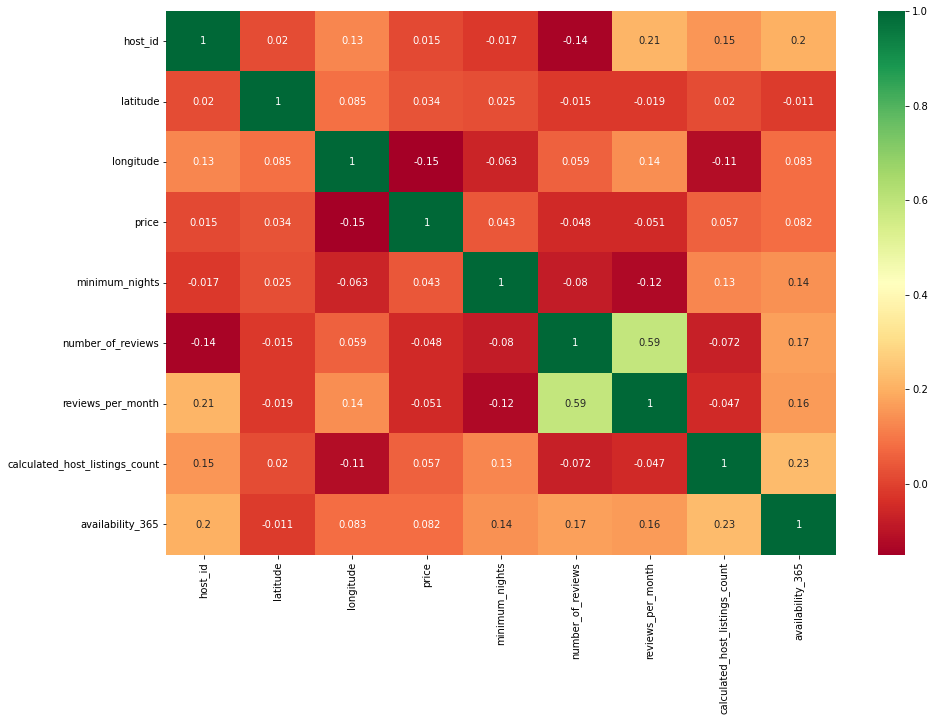

In [ ]:
# heat map various numerical type data
plt.figure(figsize = (15,10))
sns.heatmap(airbnb_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

We can see that most of the data is not highly correlated except the number_of_reviews and review_per_month.

#Find out which neighbourhood_group has how much number of the room present in there respective region.

In [ ]:
# grouping by neighbourhood group and print out the size on the basis of a particular neighbourhood group
num_of_room_present = airbnb_df["neighbourhood_group"].value_counts()
print(num_of_room_present)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


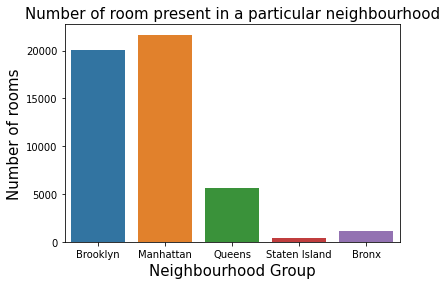

In [ ]:
#ploting the bar chart using countplot
ax = sns.countplot(x = airbnb_df["neighbourhood_group"])
#title
ax.set_title("Number of room present in a particular neighbourhood",fontsize=15)
#y-label
ax.set_ylabel('Number of rooms',fontsize=15)
#x-label
ax.set_xlabel('Neighbourhood Group',fontsize=15)
#show the plot
plt.show()

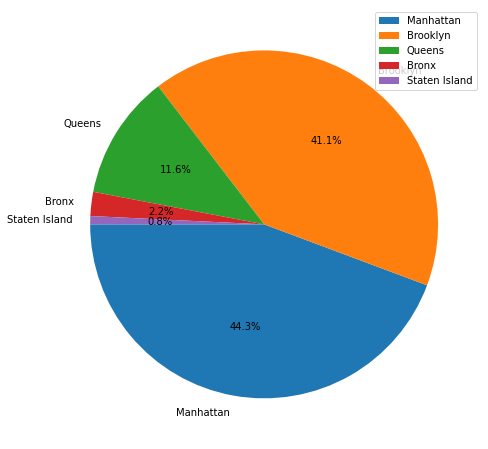

In [ ]:
#pie plot
plt.figure(figsize=(8,8))
pie_plot = plt.pie(airbnb_df.neighbourhood_group.value_counts(),labels=airbnb_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%',startangle=180)
plt.legend()
plt.show()

We can see that that manhatten **(44.3%)** is given the first position as it contains the most number of rooms followed by brooklyn **(41.1%)** and staten island has least rooms on airbnb site only **0.8%**.




#Find out the different types of room available to the guest booking through airbnb site.

In [ ]:
#assigning the different room type available in a list
list_of_types_of_room_available = list(airbnb_df.room_type.unique())
#print the list of different room type available
print(list_of_types_of_room_available)

['Private room', 'Entire home/apt', 'Shared room']


In [ ]:
# assigning no of room available in aparticular room type
different_room_type = airbnb_df["room_type"].value_counts()
#print the count of various room types
print(different_room_type)

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


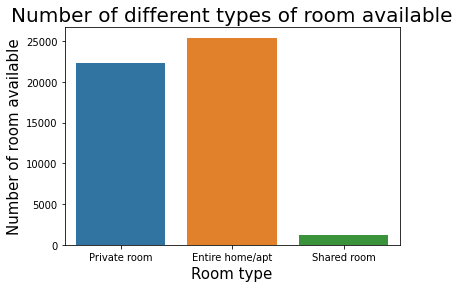

In [ ]:
#plot the bar graph using seaborn countplot
ax = sns.countplot(x = airbnb_df["room_type"])
#title
ax.set_title('Number of different types of room available',fontsize=20)
#y-label
ax.set_ylabel('Number of room available',fontsize=15)
#x-label
ax.set_xlabel('Room type',fontsize=15)
#show the plot
plt.show()

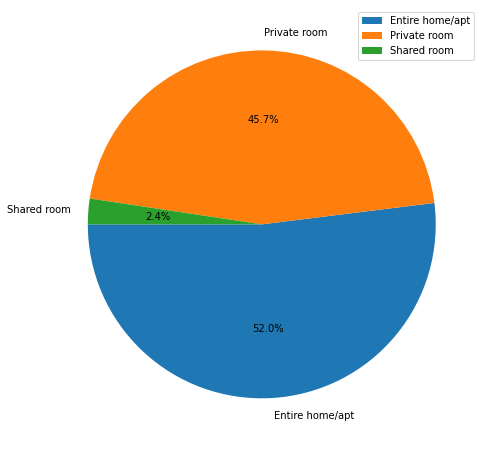

In [ ]:
#pie plot
plt.figure(figsize=(8,8))
pie_plot = plt.pie(different_room_type,labels=different_room_type.index,autopct='%1.1f%%',startangle=180)
plt.legend()
plt.show()

The room type which is available highest is Entire home/apt**(52.0%)** ,private room **(45.7%)** & shared room**(2.4%)** is very low in comparison to the other two room type.

#Find the different types of room available to the people in various neighbourhood group.

In [ ]:
#different room type in various neighbouhood
roomtype_in_various_neigh = airbnb_df.groupby('neighbourhood_group')['room_type'].value_counts().unstack()
#printing the different room type in various neighbouhood
roomtype_in_various_neigh

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


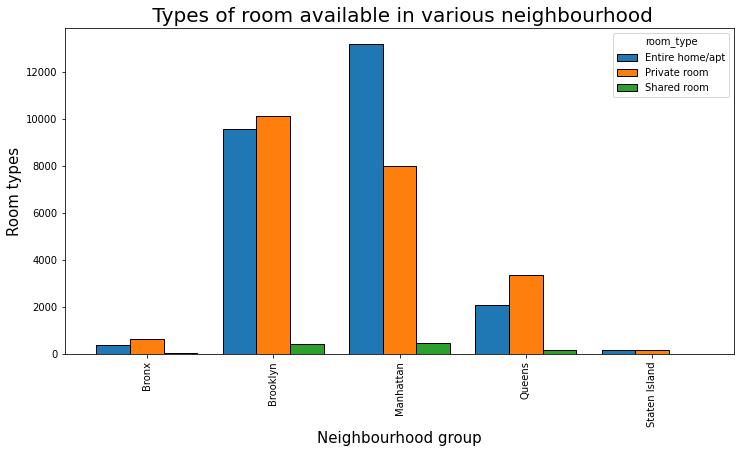

In [ ]:
#defining the bar char in axis variable
ax = roomtype_in_various_neigh.plot.bar(width=0.8,linewidth=1,edgecolor='black',figsize = (12,6),fontsize = 10)
# Set title
ax.set_title(" Types of room available in various neighbourhood", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Neighbourhood group", fontsize = 15)
ax.set_ylabel("Room types", fontsize = 15)
plt.show()

The Manhattan has the maximum no. of room type in the category of Entire home/apt & Brooklyn has highest no. in the category of Private room.

#1.   Plot on the basis on location(longitude,latitude) plot the room available in the given neighbourhood_group.
#2.   Plot on the basis on location(longitude,latitude) plot various room types available.



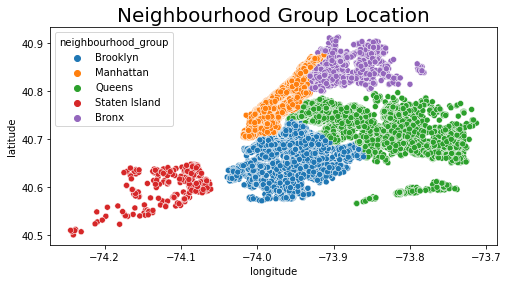

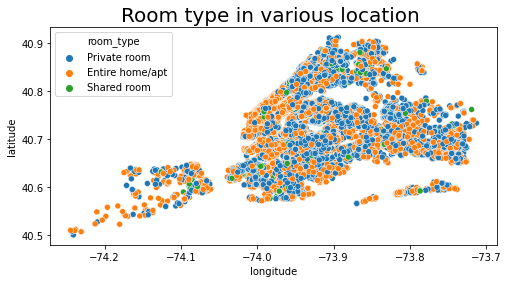

In [ ]:
# creating the blank chart
plt.figure(figsize=(8,4))
#plot the location on the basis of neighbourhood group
ax = sns.scatterplot(airbnb_df["longitude"],airbnb_df["latitude"],hue=airbnb_df['neighbourhood_group'])
#set title
ax.set_title('Neighbourhood Group Location',fontsize=20)
#show the plot
plt.show()

# creating the blank chart
plt.figure(figsize=(8,4))
#plot the location on the basis of room type
ax = sns.scatterplot(airbnb_df["longitude"],airbnb_df["latitude"],hue=airbnb_df['room_type'])
#set title
ax.set_title('Room type in various location ',fontsize=20)
#show the plot
plt.show()


We can conclude-
1.   Brooklyn contains all rooms in closed packed space, manhattan in less width and long space,queens are wider and longer,bronx in smaller closed packed space than brooklyn and staten island have rooms available seperately in a unclosed or openly manner. 
2.   We can see the private room and entire home/apt largely in various location as they are present in larger amount in comparison to shared room.



#Find out the unique neighbourhood and top 5 listing areas on the basis of neighbourhood also find out the unique host and top 5 listing areas on the basis of unique host_id .

In [ ]:
#different neighbourhood present in the airbnb data
airbnb_df.neighbourhood.unique() 

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
#No. of unique neighbourhood 
len(airbnb_df.neighbourhood.unique())

221

In [ ]:
# Top 5 listing area in airbnb data 
top_listing_area = airbnb_df['neighbourhood'].value_counts().head()
top_listing_area

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

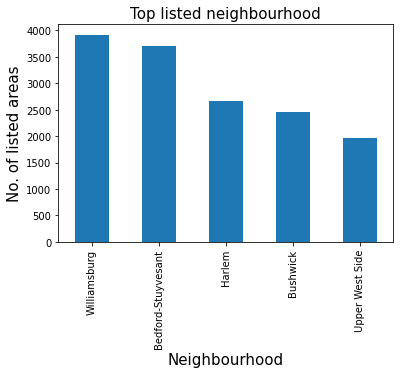

In [ ]:
ax = top_listing_area.plot(kind='bar')
ax.set_title('Top listed neighbourhood',fontsize=15)
ax.set_xlabel('Neighbourhood',fontsize=15)
ax.set_ylabel("No. of listed areas",fontsize=15)
plt.show()

Williamburg neighbourhood has the most listings followed by bedford-stuyvesant.

In [ ]:
# number of unique host in the data
Number_of_hosts=airbnb_df.host_id.unique()
print(Number_of_hosts)
print(len(Number_of_hosts))

[     2787      2845      4632 ... 274321313  23492952  68119814]
37457


There are total of 37457 unique hosts in the given data

In [ ]:
top_host_id = airbnb_df['host_id'].value_counts().head()
top_host_id

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

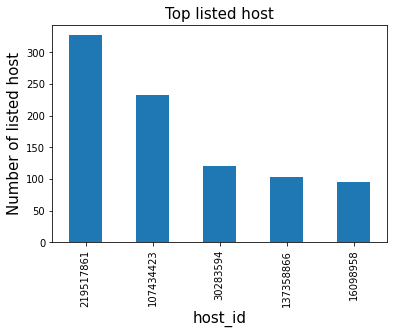

In [ ]:
ax = top_host_id.plot(kind='bar')
ax.set_title('Top listed host',fontsize=15)
ax.set_xlabel('host_id',fontsize=15)
ax.set_ylabel("Number of listed host",fontsize=15)
plt.show()

The host with host_id 219517861 has highest listing of 327.

#Find the relationship of neighbourhood group with mean price & median price.

**For Mean price:**

In [ ]:
#grouping the on neighbourhood group and aggregate the price on mean value
grouped_data1 = airbnb_df.groupby(['neighbourhood_group']).agg({'price':'mean'}).reset_index()
grouped_data1

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


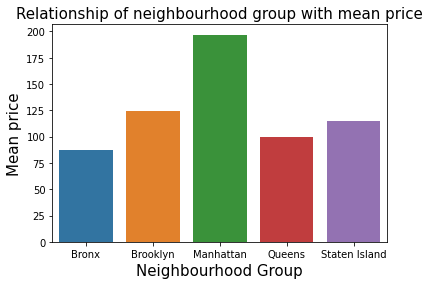

In [ ]:
#plot the bar chart 
ax = sns.barplot(x = 'neighbourhood_group',y = 'price',data = grouped_data1)
ax.set_title('Relationship of neighbourhood group with mean price',fontsize=15)
ax.set_xlabel('Neighbourhood Group',fontsize=15)
ax.set_ylabel("Mean price",fontsize=15)
plt.show()

We can conclude that according to the average price the manhattan is the most expensive place in the given airbnb dataset with \$197 followed by brooklyn \$124 then comes staten island \$115, queens with \$99 and at last is bronx with \$87.

**For Median price:**

In [ ]:
grouped_data2 = airbnb_df.groupby(['neighbourhood_group']).agg({'price':'median'}).reset_index()
grouped_data2

,neighbourhood_group,price
0,Bronx,65.0
1,Brooklyn,90.0
2,Manhattan,150.0
3,Queens,75.0
4,Staten Island,75.0


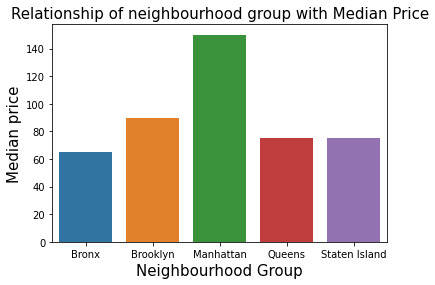

In [ ]:
ax = sns.barplot(x = 'neighbourhood_group',y = 'price',data = grouped_data2)
ax.set_title('Relationship of neighbourhood group with Median Price',fontsize=15)
ax.set_xlabel('Neighbourhood Group',fontsize=15)
ax.set_ylabel("Median price",fontsize=15)
plt.show()

We can see that from median price perspective the manhattan has the highest price \$150 followed by brooklyn \$90. Queens and staten island have equal median price \$75 and bronx is the lowest with \$65.

#Find the variation of the price distribution with the different room type 

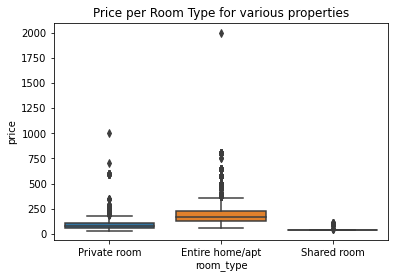

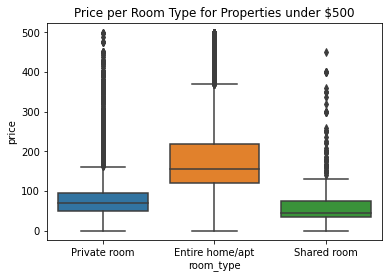

In [ ]:
# box plot for the airbnb price for various room type
airbnb_price = airbnb_df.loc[airbnb_df['price']]
ax = sns.boxplot(x='room_type', y='price', data=airbnb_price)
ax.set_title('Price per Room Type for various properties')
plt.show()

# box plot for the airbnb price under 500 for various room type
price_under_500 = airbnb_df.loc[airbnb_df['price'] < 500]
ax = sns.boxplot(x='room_type', y='price', data=price_under_500)
ax.set_title('Price per Room Type for Properties under $500')
plt.show()


The variation in the price of various room type can be seen and to clearly see the price range since they contains high price values we filter out the data with price under 500.
The Entire home/apt have the largest range with median(50 percentile) value \$160 ,private room on second with median value \$70 and shared room with lowest range and median value \$45.

#Find out the busiest host in the given data with reference to the host_id and minimum nights columns.

In [ ]:
# busiest host with reference to the host_id and minimum nights columns
busiest_host_data = airbnb_df.groupby(["host_id"])["minimum_nights"].mean()
#print the values in descending order
busiest_host_data.sort_values(ascending=False)

host_id
17550546     1250.0
6676776      1000.0
2697686       999.0
200401254     999.0
10720264      500.0
              ...  
50533072        1.0
50544293        1.0
50546859        1.0
50556696        1.0
50588693        1.0
Name: minimum_nights, Length: 37457, dtype: float64

In [ ]:
# Top 10 busiest host  
busiest_host_top10 = busiest_host_data.sort_values(ascending=False).head(10)
busiest_host_top10

host_id
17550546     1250.0
6676776      1000.0
2697686       999.0
200401254     999.0
10720264      500.0
82674375      500.0
2228137       500.0
3680008       500.0
8996336       500.0
43945071      480.0
Name: minimum_nights, dtype: float64

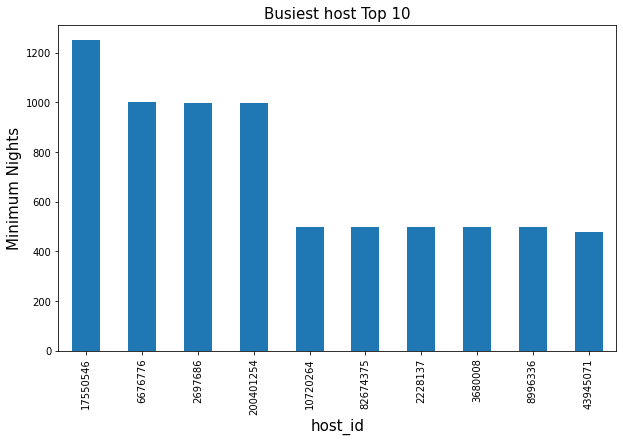

In [ ]:
# bar chart for top 10 busiest host
plt.figure(figsize=(10,6))
ax = busiest_host_top10.plot(kind='bar')
ax.set_title('Busiest host Top 10',fontsize=15)
ax.set_xlabel('host_id',fontsize=15)
ax.set_ylabel("Minimum Nights",fontsize=15)
plt.show()

We can say that host with the host_id 17550546 is the busiest host as the number of minimum nights spend is the highest at this particular host listing.

# Find out the Top 10 listing on the basis of the number of reviews.

In [ ]:
# top 10 listing on the basis of number of reviews
top10_reviews_listing = airbnb_df.nlargest(10,'number_of_reviews')
top10_reviews_listing 

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


There are 4 manhattan,4 queens and two brooklyn neighbourhood type in top 10 reviewed listing.Total of 9 room type are private room and one is entire home/apt and most of them with price range \$46-\$49.The highest no. of reviews given is 629.

#Find out the top 10 neighbourhood & neighbourhood group with various room types according to the reviews per month.

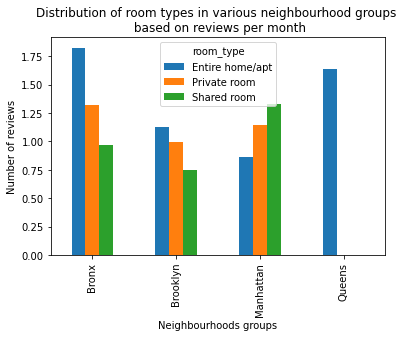

In [ ]:
#calculate the type of property which got the most reviews in a particular neighbourhood group.
room_types_neighbourhood_group = airbnb_df.groupby(['neighbourhood_group','room_type'])['reviews_per_month'].mean()
neighbourhood_group=room_types_neighbourhood_group.head(10)
ax=neighbourhood_group.unstack().plot(kind='bar')
#set-title
ax.set_title("Distribution of room types in various neighbourhood groups \n based on reviews per month")
#set-x and y label
ax.set_ylabel("Number of reviews")
ax.set_xlabel("Neighbourhoods groups")
plt.show()

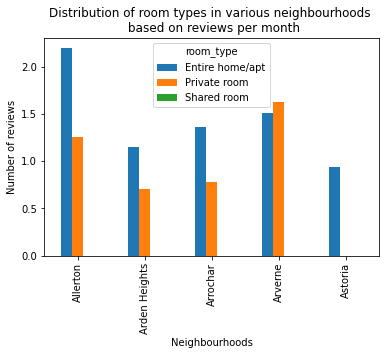

In [ ]:
#calculate the type of property which got the most reviews in a particular neighbourhood.
room_types_neighbourhood = airbnb_df.groupby(['neighbourhood','room_type'])['reviews_per_month'].mean()
neighbourhoood=room_types_neighbourhood.head(10)
ax=neighbourhoood.unstack().plot(kind='bar')
#set title
ax.set_title("Distribution of room types in various neighbourhoods \n based on reviews per month")
#set-x and y label
ax.set_ylabel("Number of reviews")
ax.set_xlabel("Neighbourhoods")
plt.show()

Except for Manhattan, in all the neighbourhood groups, 'Entire home/apt' is the room type that gets most traffic.We can say that with respect to neighbourhood that none of top 10 locations have reviews for shared room but both the parameters give Allerton neighbourhood in Bronx with 'Entire home/apt' roomtype as the highest therefore Allerton, Bronx has the highest traffic.

#Find the relationship between the price and availability of various room available in different neighbourhood?

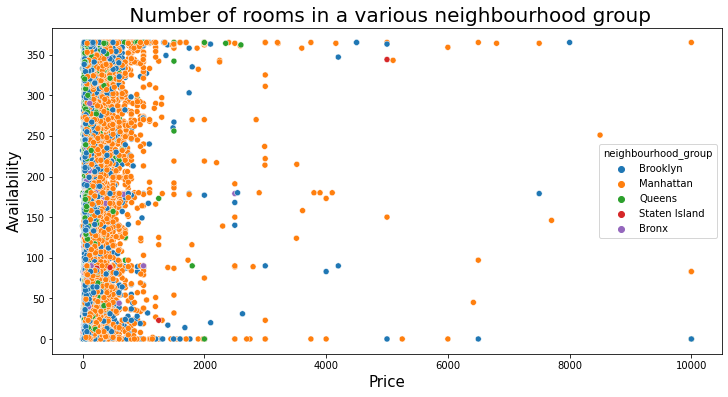

In [ ]:
# scatter plot between price and availability
plt.figure(figsize=(12,6))
ax = sns.scatterplot(airbnb_df['price'],airbnb_df['availability_365'],hue=airbnb_df['neighbourhood_group'])
#set title
ax.set_title(' Number of rooms in a various neighbourhood group',fontsize=20)
#set x and y label
ax.set_ylabel('Availability',fontsize=15)
ax.set_xlabel('Price',fontsize=15)
plt.show()

*   From the scatter plot we can see that room with price range less than \$1000 are available with all the values higher or lower it depends on other factors.
*   After price \$2000 less room are available and become less further \$4000.They can have high availability but they are less in number.
*   At last we can see only 3 room available which most expensive with price range of \$10,000.






#Find the relationship between neighbourhood group and availability of room

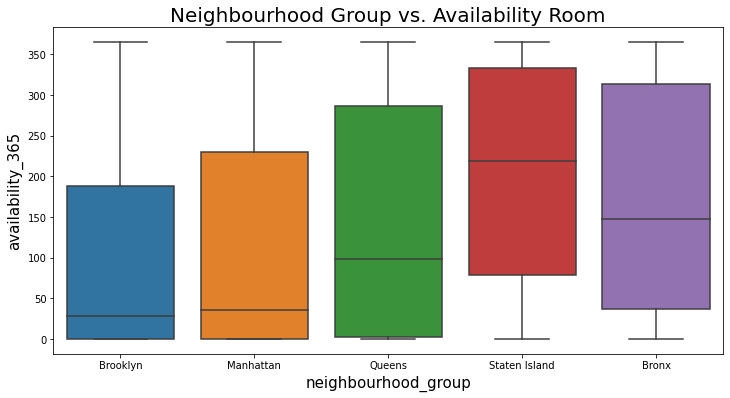

In [ ]:
#box plot between the neighbourhood group and availabilty
plt.figure(figsize=(12,6))
ax = sns.boxplot( x='neighbourhood_group',y='availability_365',data=airbnb_df)
ax.set_title('Neighbourhood Group vs. Availability Room',fontsize=20)
ax.set_xlabel('neighbourhood_group',fontsize=15)
ax.set_ylabel('availability_365',fontsize=15)
plt.show()

Various neighbourhood group have different avaliability of room and we can conclude different results from the box plot
*   Staten island has the highest median value on the basis of availability followed by bronx,queens,manhattan and least is brooklyn.
*   Queens has the highest range of availability in a particular neighbourhood group.
 




#**CONCLUSION**
The given data appear to be very rich dataset with a variety of columns that allowed us to do the exploration on each significant columns present in the dataset.

1. Most of the data is not highly correlated.
2. Manhattan has the highest no of room present in a neighbourhood group.
3. Entire home/apt is the maximum room type preferred by guest.
4. Manhattan is maximum in entire home/apt category followed by brooklyn in private room.
5. Brooklyn is most dense according to the location and shared rooms are much less in comparison to the other two.
6. The host with host_id 219517861 has highest listing of 327.
7. Williamsburg neighbourhood has the most listings followed by bedford-stuyvesant.
8. Manhatten has the highest price range according to both mean and median prices.
9. The Entire home/apt have the largest range of price value with median value of $160.
10. The host with host_id 17550546 is the busiest host as the number of minimum nights spend is the highest.
11. The highest no. of reviews given is 629
12. Allerton, Bronx with 'Entire home/apt' room type has the highest traffic according to the reviews per month.
13. Staten island has the highest median value on the basis of availability

